<a href="https://colab.research.google.com/github/cookie-pan/kaggle-Titanic/blob/main/version/%E2%80%9Ctatanic_end_version_ipynb%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install sklearn

In [2]:
import numpy as np 
import pandas as pd 
import copy
import warnings 
import seaborn as sns
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
#  (/kaggle/working/) 当前工作路径默认为output路径
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
warnings.filterwarnings('ignore')
# sns.set(style='white',context='notebook',palette='muted')
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

# 读取数据

In [4]:
training = pd.read_csv('train.csv')
testing = pd.read_csv('test.csv')


In [5]:
train=copy.deepcopy(training)
test=copy.deepcopy(testing)

# 合并测试集和训练集

In [6]:
#查看数据是否有异常值
train.describe()
test.describe()
#将两表合并
#ignore_index=True 重新设置合并后的索引，append是创建副本
all=train.append(test,ignore_index=True) 
all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [8]:
#我们观察到Fare只有一个缺失值
all[all["Fare"].isnull()]  
#Embarked有两个缺失值
all[all["Embarked"].isnull()]
#Age和Cabin需要填充

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
all


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 特征分析

### 港口数据分析

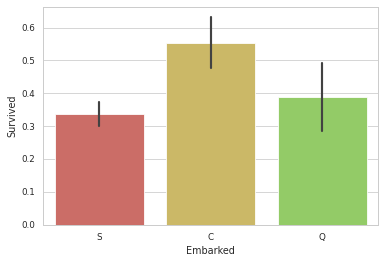

In [12]:
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("hls", 8))
sns.set_context("paper")

sns.barplot(data=train,x='Embarked',y='Survived')
#C港口存活率明显高于其他港口

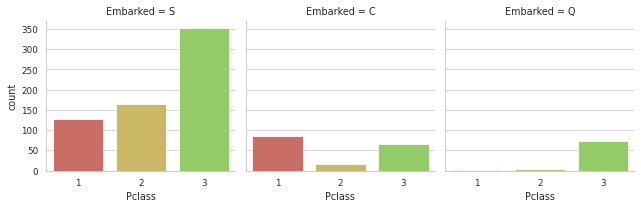

In [13]:
#法国登船乘客生存率较高原因可能与其头等舱乘客比例较高有关
#但Q港口的存活率也较高，所以存活率可能与港口相关
sns.factorplot('Pclass',col='Embarked',data=train,kind='count',size=3)

### parch分析

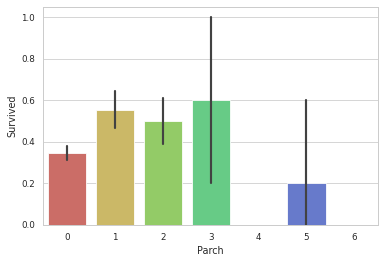

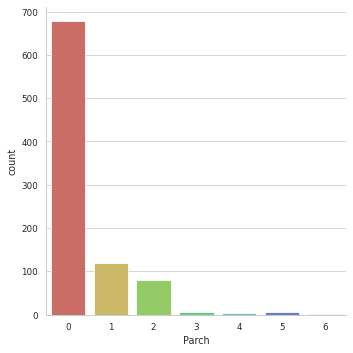

In [18]:

sns.barplot(data=train,x='Parch',y='Survived')
#parch为1-3的存活率要明显高一些
#观察一下parch为1-5的样本量
sns.factorplot('Parch',data=train,kind='count',size=5)


### sibsp分析

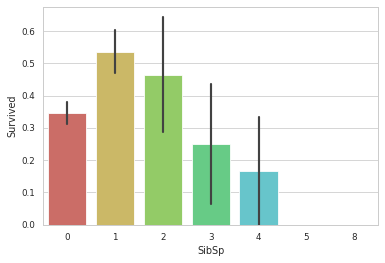

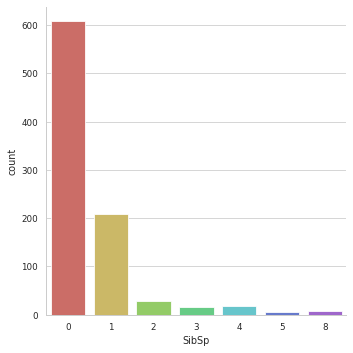

In [19]:
sns.barplot(data=train,x='SibSp',y='Survived')
sns.factorplot('SibSp',data=train,kind='count',size=5)

### Pclass分析

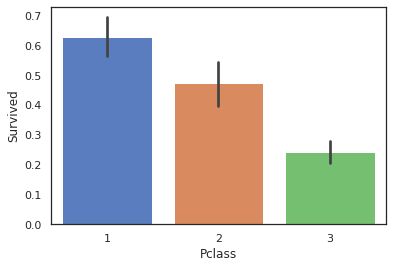

In [286]:
sns.barplot(data=train,x='Pclass',y='Survived')

### sex分析

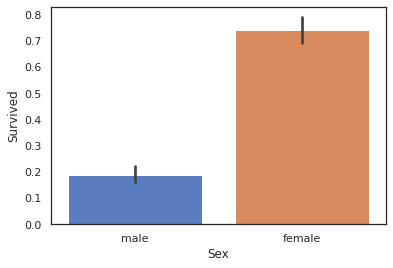

In [287]:
sns.barplot(data=train,x='Sex',y='Survived')

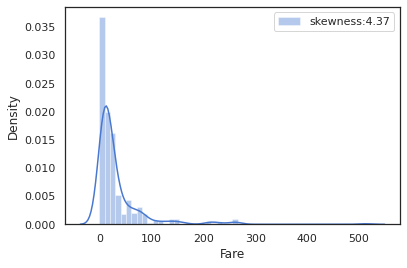

In [288]:
#查看fare分布
farePlot=sns.distplot(all['Fare'][all['Fare'].notnull()],label='skewness:%.2f'%(all['Fare'].skew()))
farePlot.legend(loc='best')

# 数据清洗

### 码头数据缺失值填充

In [289]:
all['Embarked'].value_counts(normalize=True)
#大部分的乘客目的地都是S
#我们用S填充缺失值
all.loc[all["Embarked"].isnull(),["Embarked"]]="S"
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


### 根据pclass对Fare缺失值进行填充

In [290]:

"""可以看到Fare与阶级线性相关性很大，我们利用Fare缺失值的阶级对他进行填充"""


AgeCorrDf=pd.DataFrame()
AgeCorrDf=all.corr()
AgeCorrDf['Fare'].sort_values()

#得到缺失值旅客是第三阶级的
all[all["Fare"].isnull()]

#用第三阶级的Fare平均值对缺失的Fare进行填充
tmean=all["Fare"][all["Pclass"]==3].mean()
all.loc[all["Fare"].isnull(),["Fare"]]=tmean


In [291]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# 特征工程

### Fare对数化处理

In [292]:
#fare数据呈左偏分布
#对数化处理fare值
all['log_Fare']=all['Fare'].map(lambda x: np.log(x) if x>0 else 0)


### SibSp分两类处理 

In [293]:
def sibsp_group(num):
  if num==3 or num==4 or num==5 or num==8 or num==0:
    return 0
  
  else :
    return 1 


all["group_sibsp"]=all["SibSp"].map(sibsp_group)

### Parch分两类处理

In [294]:
def parch_group(num):

  if num==1 or num==3 or num ==2:
    return 1
 
  else :
    return 0
all["group_parch"]=all["Parch"].map(parch_group)

### Cabin特征分两类处理

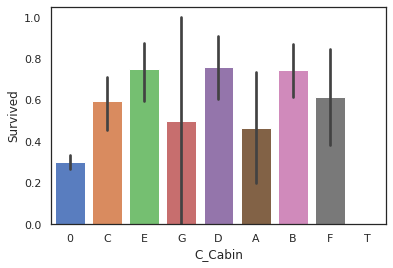

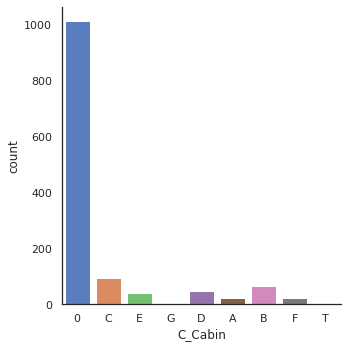

In [295]:
t=train["Survived"][train["Cabin"].notnull()]
t.value_counts(normalize=True)
all["Survived"].value_counts(normalize=True)
t=train["Survived"][train["Cabin"].isnull()]
t.value_counts(normalize=True)

#有Cabin和无Cabin存活率变化7%


all['Cabin'].replace(np.NaN,0,inplace=True) #把Na值替换为0
all['1_Cabin']=all['Cabin'].map(lambda x: 1 if x!=0 else 0) #把剩下的有cabin的数据存为1
all["C_Cabin"]=all['Cabin'].map(lambda x:str(x)[0])  #把有Cabin的数据的首字符提出来
# print(all["C_Cabin"].value_counts())
sns.barplot(data=all,x="C_Cabin",y='Survived')
sns.factorplot('C_Cabin',data=all,kind='count',size=5)

### 在名字中提取信息

In [296]:
all['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip()).value_counts() 
all["Title"]=all['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())

title_dict={}
title_dict["Mr"]="Mr"
title_dict["Miss"]="Miss"
title_dict["Mrs"]="Mrs"
title_dict["Rev"]="Royalty"
title_dict["Dr"]="Royalty"
title_dict["Master"]="Royalty"
title_dict["Col"]="Royalty"
title_dict["Mlle"]="Miss"
title_dict["Major"]="Royalty"
title_dict["Ms"]="Miss" #归为女性最多的一类
title_dict["Lady"]="Royalty"
title_dict["Sir"]="Royalty"
title_dict["Mme"]="Royalty"
title_dict["Don"]="Royalty"
title_dict["Capt"]="Royalty"
title_dict["the Countess"]="Royalty"
title_dict["Jonkheer"]="Royalty"
title_dict["Dona"]="Royalty"

all["Title"]=all["Title"].map(title_dict)
all['Title'].value_counts()

Mr         757
Miss       264
Mrs        197
Royalty     91
Name: Title, dtype: int64

### 提取车票中的信息

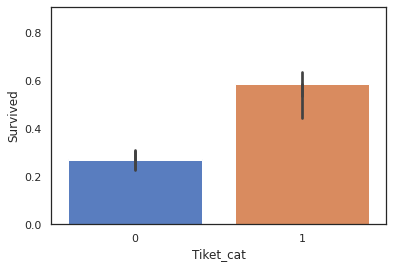

In [297]:
ticnum_dict=all['Ticket'].value_counts()
all["Ticket_count"]=all["Ticket"].map(ticnum_dict)
all["Ticket"].map(ticnum_dict).value_counts()
sns.barplot(data=all,x="Ticket_count",y='Survived')

#相同车票人数为2，3，4时存活率较高
#我们把车票人数分为两类
def ticke_num_group(num):
  if (num==2) or (num==3) or (num==4):
    return 1
  else:
    return 0


all["Tiket_cat"]=all["Ticket_count"].map(ticke_num_group)
sns.barplot(data=all,x="Tiket_cat",y='Survived')

### 提取同行的人数（parch+sibsp）

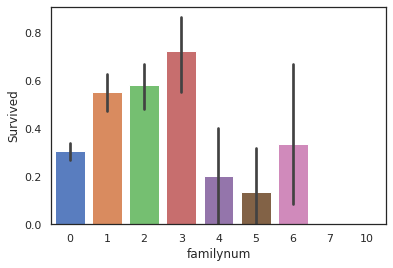

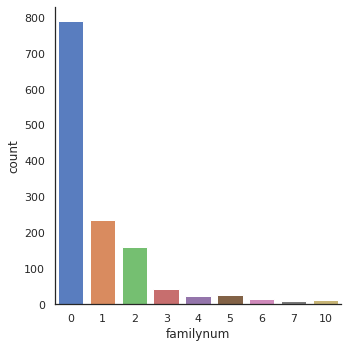

In [298]:
all['familynum']=all['Parch']+all['SibSp']
#查看familyNum与Survived
sns.barplot(data=all,x='familynum',y='Survived')
sns.factorplot('familynum',data=all,kind='count',size=5)


#分成两类
def group_familynum(num):
  if num==1 or num==2 or num==3:
    return 1
  else :
    return 0
all["group_familynum"]=all['familynum'].map(group_familynum)

### 用knn对缺失的Age进行填充

In [299]:
all

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_Fare,group_sibsp,group_parch,1_Cabin,C_Cabin,Title,Ticket_count,Tiket_cat,familynum,group_familynum
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,1.981001,1,0,0,0,Mr,1,0,1,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.266662,1,0,1,C,Mrs,2,1,1,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,2.070022,0,0,0,0,Miss,1,0,0,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.972177,1,0,1,C,Mrs,2,1,1,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,2.085672,0,0,0,0,Mr,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,0,S,2.085672,0,0,0,0,Mr,1,0,0,0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,4.690430,0,0,1,C,Royalty,3,1,0,0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1.981001,0,0,0,0,Mr,1,0,0,0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,0,S,2.085672,0,0,0,0,Mr,1,0,0,0


创建包含建模特征的临时表

In [300]:
# tem=all[["Pclass","Sex","Age","group_sibsp","Parch","1_Cabin","Tiket_cat","Title"	]]
cat=["Sex","Title","Embarked"]
num=["Pclass","Age","group_sibsp","group_parch","1_Cabin","log_Fare","Tiket_cat","group_familynum"]
tem_cat = pd.get_dummies(all[cat])
tem=pd.concat([tem_cat,all[num]],axis=1)
tem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_female       1309 non-null   uint8  
 1   Sex_male         1309 non-null   uint8  
 2   Title_Miss       1309 non-null   uint8  
 3   Title_Mr         1309 non-null   uint8  
 4   Title_Mrs        1309 non-null   uint8  
 5   Title_Royalty    1309 non-null   uint8  
 6   Embarked_C       1309 non-null   uint8  
 7   Embarked_Q       1309 non-null   uint8  
 8   Embarked_S       1309 non-null   uint8  
 9   Pclass           1309 non-null   int64  
 10  Age              1046 non-null   float64
 11  group_sibsp      1309 non-null   int64  
 12  group_parch      1309 non-null   int64  
 13  1_Cabin          1309 non-null   int64  
 14  log_Fare         1309 non-null   float64
 15  Tiket_cat        1309 non-null   int64  
 16  group_familynum  1309 non-null   int64  
dtypes: float64(2),

In [301]:
!pip install fancyimpute

knn预测Age填充到原表中

In [302]:
from fancyimpute import KNN
features_knn_imputed = KNN(k=7).fit_transform(tem)

# print(features_knn_imputed)
tem_df=pd.DataFrame(features_knn_imputed.reshape(1309,-1),columns=list(tem.columns))
# print(train)
all["Age"]=tem_df["Age"]
all.info()

Imputing row 1/1309 with 0 missing, elapsed time: 0.403
Imputing row 101/1309 with 0 missing, elapsed time: 0.404
Imputing row 201/1309 with 0 missing, elapsed time: 0.406
Imputing row 301/1309 with 1 missing, elapsed time: 0.407
Imputing row 401/1309 with 0 missing, elapsed time: 0.408
Imputing row 501/1309 with 0 missing, elapsed time: 0.410
Imputing row 601/1309 with 0 missing, elapsed time: 0.412
Imputing row 701/1309 with 0 missing, elapsed time: 0.414
Imputing row 801/1309 with 0 missing, elapsed time: 0.415
Imputing row 901/1309 with 0 missing, elapsed time: 0.417
Imputing row 1001/1309 with 0 missing, elapsed time: 0.418
Imputing row 1101/1309 with 0 missing, elapsed time: 0.420
Imputing row 1201/1309 with 0 missing, elapsed time: 0.421
Imputing row 1301/1309 with 0 missing, elapsed time: 0.423
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -----------

In [303]:
# tem=pd.DataFrame(all["Name"].map(lambda x:x.split(",")[0]).value_counts())
# tem

In [304]:
# all["Name"].map(lambda x:x.split(",")[0]).value_counts()

分析男性和女性在同一个家族里同生共死的现象

In [305]:
tem=all["Name"].map(lambda x:x.split(",")[0]).value_counts()
tem_df=pd.DataFrame(all["Name"].map(lambda x:x.split(",")[0]).value_counts())
#创建新特征：每个名字出现的次数
all["Surname"]=all["Name"].map(lambda x:x.split(",")[0])
all["Surname_count"]=all["Surname"].map(tem)

tem_df=tem_df[tem_df["Name"]>1]
teml=list(tem_df.index)




#一个家族男、女性同生共死现象
for i in teml:
  print(i)
  print(all[["Survived","Sex","Age"]][all["Surname"]==i])


Andersson
      Survived     Sex   Age
13         0.0    male  39.0
68         1.0  female  17.0
119        0.0  female   2.0
146        1.0    male  27.0
541        0.0  female   9.0
542        0.0  female  11.0
610        0.0  female  39.0
813        0.0  female   6.0
850        0.0    male   4.0
1105       NaN  female  38.0
1211       NaN    male  26.0
Sage
      Survived     Sex        Age
159        0.0    male  14.495981
180        0.0  female  10.577147
201        0.0    male  17.955930
324        0.0    male  17.955930
792        0.0  female  10.577147
846        0.0    male  17.955930
863        0.0  female  10.577147
1079       NaN  female  10.577147
1233       NaN    male  37.920581
1251       NaN    male  14.500000
1256       NaN  female  41.755261
Goodwin
      Survived     Sex   Age
59         0.0    male  11.0
71         0.0  female  16.0
386        0.0    male   1.0
480        0.0    male   9.0
678        0.0  female  43.0
683        0.0    male  14.0
1030       NaN    

In [306]:





all["tem_female_dead"]=np.NaN
all["tem_male_dead"]=np.NaN
for i in teml:
  # print(i)
  try:
    t=all[["Survived"]][(all["Surname"]==i)&(all["Sex"]=="female")&(all["Survived"].notnull())].value_counts(normalize=True)[0]
  except KeyError:
    t=np.NaN
  all["tem_female_dead"][(all["Surname"]==i)&(all["Sex"]=="female")]=t

for i in teml:
  # print(i)
  try:
    t=all[["Survived"]][(all["Surname"]==i)&(all["Sex"]=="male")&(all["Survived"].notnull())].value_counts(normalize=True)[0]
  except KeyError:
    t=np.NaN
  all["tem_male_dead"][(all["Surname"]==i)&(all["Sex"]=="male")]=t


In [307]:
all["tem_male_dead"][(all["Surname"]==teml[0])&(all["Sex"]=="male")]

13      0.666667
146     0.666667
850     0.666667
1211    0.666667
Name: tem_male_dead, dtype: float64

将同一个家族的男、女性死亡率超过50%的年龄改为“易死亡年龄”

In [308]:
all["Age"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_female_dead"]<0.5)]=6

all["Age"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_female_dead"]>=0.5)]=60
all["Sex"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_female_dead"]>=0.5)]="male"

#男性同生现象不是很明显，对精确度没有什么显著影响
all["Age"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_male_dead"]<0.5)]=6
all["Sex"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_male_dead"]<0.5)]="female"

all["Age"][(all["Survived"].isnull())&(all["Surname_count"]>1)&(all["tem_male_dead"]>=0.5)]=60

In [309]:
#这个家族女性死亡的概率
# print(teml[3])
# t=all[["Survived"]][(all["Surname"]==teml[3])&(all["Sex"]=="female")].value_counts(normalize=True)[0]
# all["tem_female_dead"]=100
# all["tem_female_dead"][(all["Surname"]==teml[0])&(all["Sex"]=="female")]=t
# all["tem_female_dead"][(all["Surname"]==teml[0])&(all["Sex"]=="female")]

### 分类数据hot化

In [310]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()



# tem=pd.concat([tem_cat,all[num]],axis=1)
# tem.info()
# tem_num=pd.DataFrame(std.fit_transform(all[num]),columns=num)
#

cat=["Sex","Title","Embarked"]
num=["Pclass","Age","group_sibsp","group_parch","1_Cabin","log_Fare","Tiket_cat","group_familynum","familynum","Ticket_count"]


num_new=["Pclass","group_sibsp","group_parch","1_Cabin","Tiket_cat"]
data=pd.concat([tem_cat,all[num]],axis=1)


In [311]:
data

,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Pclass,Age,group_sibsp,group_parch,1_Cabin,log_Fare,Tiket_cat,group_familynum,familynum,Ticket_count
0,0,1,0,1,0,0,0,0,1,3,22.000000,1,0,0,1.981001,0,1,1,1
1,1,0,0,0,1,0,1,0,0,1,38.000000,1,0,1,4.266662,1,1,1,2
2,1,0,1,0,0,0,0,0,1,3,26.000000,0,0,0,2.070022,0,0,0,1
3,1,0,0,0,1,0,0,0,1,1,35.000000,1,0,1,3.972177,1,1,1,2
4,0,1,0,1,0,0,0,0,1,3,35.000000,0,0,0,2.085672,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,0,1,0,0,0,0,1,3,25.714286,0,0,0,2.085672,0,0,0,1
1305,1,0,0,0,0,1,1,0,0,1,39.000000,0,0,1,4.690430,1,0,0,3
1306,0,1,0,1,0,0,0,0,1,3,38.500000,0,0,0,1.981001,0,0,0,1
1307,0,1,0,1,0,0,0,0,1,3,39.071429,0,0,0,2.085672,0,0,0,1


In [312]:
tem=pd.concat([all[cat],all[num]],axis=1)
tem=tem[:891]
tem_s=train["Survived"]
figure_data=pd.concat([tem,tem_s],axis=1)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

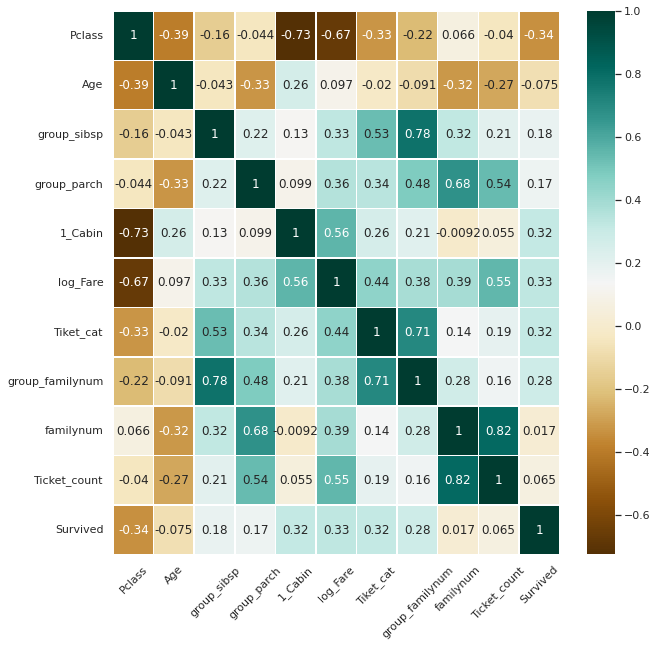

In [313]:
#热力图，查看Survived与其他特征间相关性大小
plt.figure(figsize=(10,10))
sns.heatmap(figure_data.corr(),cmap='BrBG',annot=True,
           linewidths=.5)
plt.xticks(rotation=45)


In [314]:
data.columns

Index(['Sex_female', 'Sex_male', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Royalty', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass',
       'Age', 'group_sibsp', 'group_parch', '1_Cabin', 'log_Fare', 'Tiket_cat',
       'group_familynum', 'familynum', 'Ticket_count'],
      dtype='object')

In [315]:
# data.drop([ 'familynum'],axis=1,inplace=True)

In [316]:
data_train=data[:891]
data_test=data[891:1310]

data_tar=train["Survived"]

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# X_train,X_test,y_train,y_test=train_test_split(data_train,data_tar)
# print(X_train.shape)
# print(X_test.shape)

print(data_test.shape)
data_train=np.array(data_train).reshape(891,-1)
data_test=np.array(data_test).reshape(418,-1)

print(data_train.shape)

(418, 19)
(891, 19)


In [318]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold

#设置kfold，交叉采样法拆分数据集
kfold=StratifiedKFold(n_splits=10)

#汇总不同模型算法
classifiers=[]
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())

In [319]:
cv_results=[]
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier,data_train,data_tar,
                                      scoring='accuracy',cv=kfold,n_jobs=-1))
    
#求出模型得分的均值和标准差
cv_means=[]
cv_std=[]
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
models_accuracy=pd.DataFrame({'cv_mean':cv_means,
                     'cv_std':cv_std,
                     'algorithm':['SVC','DecisionTreeCla','RandomForestCla','ExtraTreesCla',
                                  'GradientBoostingCla','KNN','LR','LinearDiscrimiAna']})

models_accuracy

,cv_mean,cv_std,algorithm
0,0.766617,0.050583,SVC
1,0.767740,0.040994,DecisionTreeCla
2,0.814881,0.046035,RandomForestCla
3,0.801348,0.033711,ExtraTreesCla
4,0.829413,0.039780,GradientBoostingCla
5,0.792397,0.038822,KNN
6,0.822672,0.034368,LR
7,0.819301,0.028194,LinearDiscrimiAna


可视化查看代码的各种表现

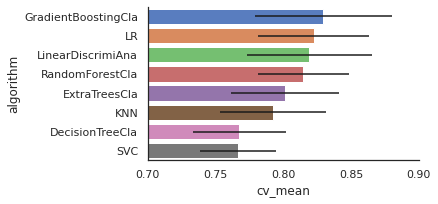

In [320]:
cvResFacet=sns.FacetGrid(models_accuracy.sort_values(by='cv_mean',ascending=False),sharex=False,
            sharey=False,aspect=2)
cvResFacet.map(sns.barplot,'cv_mean','algorithm',**{'xerr':cv_std},
               palette='muted')
cvResFacet.set(xlim=(0.7,0.9))
cvResFacet.add_legend()

模型调优

In [321]:
#GradientBoostingClassifier模型
# GBC = GradientBoostingClassifier()
# param_info = {'loss' : ["deviance"],
#               'n_estimators' : [100,200,300],
#               'learning_rate': [0.1, 0.05, 0.01],
#               'max_depth': [4, 8],
#               'min_samples_leaf': [100,150],
#               'max_features': [0.3, 0.1] 
#               }
# modelgsGBC = GridSearchCV(GBC,param_grid = param_info, cv=kfold, 
#                                      scoring="accuracy", n_jobs= -1, verbose = 1)
# modelgsGBC.fit(data_train,data_tar)

# #LogisticRegression模型
# modelLR=LogisticRegression()
# LR_param_info = {'C' : [1,2,3],
#                 'penalty':['l1','l2']}
# modelgsLR = GridSearchCV(modelLR,param_grid = LR_param_info, cv=kfold, 
#                                      scoring="accuracy", n_jobs= -1, verbose = 1)
# modelgsLR.fit(data_train,data_tar)

# print("GBC_best_accu:",modelgsGBC.best_score_)
# print("LR_best_accu:",modelgsLR.best_score_)

In [323]:
GBC=GradientBoostingClassifier()
GBC.fit(data_train,data_tar)
LR=LogisticRegression()
LR.fit(data_train,data_tar)

LogisticRegression()

In [328]:
print("GBC_best_accu:",GBC.score(data_train,data_tar))
print("LR_best_accu:",LR.score(data_train,data_tar))

GBC_best_accu: 0.9012345679012346
LR_best_accu: 0.8249158249158249


比较这两种算法的roc图

<Figure size 432x288 with 0 Axes>

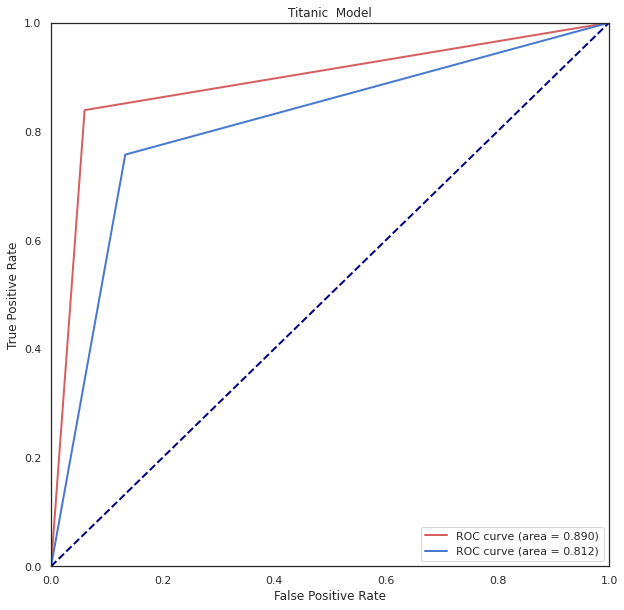

In [324]:
modelgsGBCtestpre_y=GBC.predict(data_train).astype(int)
modelgsLRtestpre_y=LR.predict(data_train).astype(int)
#画图
from sklearn.metrics import roc_curve, auc  ###计算roc和auc
# Compute ROC curve and ROC area for each class
fpr_G,tpr_G,threshold_G = roc_curve(data_tar, modelgsGBCtestpre_y) ###计算真正率和假正率
roc_auc_G = auc(fpr_G,tpr_G) ###计算auc的值
fpr_R,tpr_R,threshold_R = roc_curve(data_tar, modelgsLRtestpre_y) ###计算真正率和假正率
roc_auc_R = auc(fpr_R,tpr_R) ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr_G, tpr_G, color='r',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc_G) ###假正率为横坐标，真正率为纵坐标做曲线

plt.plot(fpr_R, tpr_R, color='b',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc_R) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Titanic  Model')
plt.legend(loc="lower right")
plt.show()

通过观察roc和auc可以看出GBC算法更好

计算混淆矩阵

In [325]:
#混淆矩阵
from sklearn.metrics import confusion_matrix
print('GradientBoostingClassifier模型混淆矩阵为\n',confusion_matrix(data_tar.astype(int).astype(str),modelgsGBCtestpre_y.astype(str)))
print('LinearRegression模型混淆矩阵为\n',confusion_matrix(data_tar.astype(int).astype(str),modelgsLRtestpre_y.astype(str)))

GradientBoostingClassifier模型混淆矩阵为
 [[516  33]
 [ 55 287]]
LinearRegression模型混淆矩阵为
 [[476  73]
 [ 83 259]]


In [329]:
# from sklearn.model_selection import cross_val_score
import csv
# for i in [0.001,0.01,0.1,1,10,100]:
#     logreg=LogisticRegression(C=i)  #c越小正则化越强
#     logreg.fit(data_train,data_tar)
#     acu_array=cross_val_score(logreg,data_train,data_tar, cv=10, scoring='accuracy')
    
#     print("正则系数",i,"mean__accuracy:",acu_array.mean())
    
predict_data=pd.DataFrame(LR.predict(data_test).astype(int).reshape(-1,1),columns=["Survived"])
submission=pd.concat([testing["PassengerId"],predict_data],axis=1)

file_name= "submission"+".csv"
submission.to_csv(file_name,index=False)



    # print(logreg.score(X_train,y_train))
    # print(logreg.score(X_test,y_test))

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures

# polynomial = PolynomialFeatures(degree=3)
# X_poly_train=polynomial.fit_transform(X_train)
# # print(X_poly.shape)
# X_poly_test=polynomial.fit_transform(X_test)

# logreg=LogisticRegression()  #c越小正则化越强
# logreg.fit(X_poly_train,y_train)
# print(logreg.score(X_poly_train,y_train))
# print(logreg.score(X_poly_test,y_test))

In [ ]:

# logreg=LogisticRegression(C=1)
# logreg.fit(X_train,y_train)


# with open ("submission.csv","w",newline="") as fp:
#         writer = csv.writer(fp)
#         writer.writerow([test, 'tested_positive'])

In [ ]:
# print("class2`s mean age:{}".format(train[['Pclass',"Age"]][train["Pclass"]==2].mean()))
# print("class3`s mean age:{}".format(train[['Pclass',"Age"]][train["Pclass"]==3].mean()))
# cabin_1=train[train["Pclass"]==1]["Age"]
# print(cabin_1.hist())
# cabin_2=none_u_cabin[t_df["Pclass"]==2]
# print(cabin_2.hist())
# cabin_3=none_u_cabin[t_df["Pclass"]==3]
# print(cabin_3.hist())